# 특성 공학과 규제

- 농어의 무게를 예측한 결과
    - 학습 점수보다 테스트 점수가 더 높음(과소적합)
    - 이 문제를 해결하기 위해 더 고차항을 넣어야 할것 같은데 얼만큼 고차항을 넣어야 할지도 모르고 수동으로 고차항을 넣기도 힘듬
    
    - 또다른 해결책
        - 농어의 특성 데이터를 더 준비한다
            - 두께 데이터
        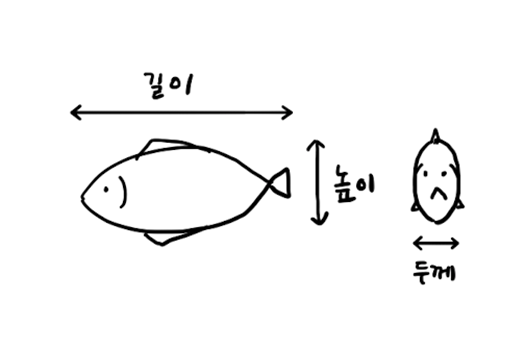
    - 선형회귀는 특성이 어느정도 많을수록 효과가 좋아진다

### 다중회귀
- 여러개의 특성을 사용한 선형 회귀
- 한개의 특성을 사용했을 때 선형회귀 모델을 직선을 학습한다.
- 두개의 특성을 사용하면 ????
    - 선형회귀는 평면을 학습
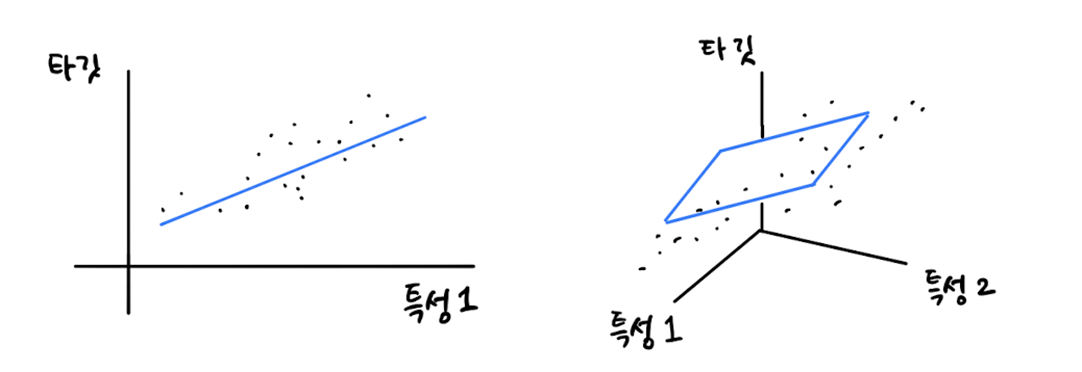
- 특성이 두개면 타깃값과 함께 3차원 공간을 형성함
- 타깃 = a X 특성1 + b X 특성2 + 절편 은 평면이 됨
   - 특성이 3개인 경우는??
       - 그림으로 표현할 수는 없지만 축이 하나 더 들어난다고 보면 됨
       - 특성이 많은 고차원에서는 선형 회귀가 매우 복잡한 공간을 표현       

- 농어 길이 X 높어 높이 등 새로운 특성도 만들어서 회귀식에 추가해 보자
    - 기존의 특성을 사용해 새로운 특성을 만들어 내는 것 : **특성공학**
    - 사인킷런의 PolynomialFeatures를 사용하면 간단히 추가가 된다

- **참고. 단항  vs 다항 vs 다중**

- **단항 회귀** 
    - 독립변수(feature)와 종속변수(target)의 관계가 일차 방정식 형태
​
- **다중선형회귀**
​
    - $ y = w_0 + w_1 X_{1} + w_2 X_{2} + w_3 X_{3} + ... + w_n X_{n} $
    - 독립변수(festure)와 종속변수(target)의 관계가 일차방정식으로 표현된 회귀
    - 직선으로 표현

- **다항 회귀  (Polynomial Regression)** 

    - **다항회귀**

        - $ y = w_0 + w_1 X_{1} + w_2 X_{2} + w_3 X_{1}X_{2} + w_4 X_{1}^2 + w_5 X_{2}^2 $

        - 회귀가 독립변수의 일차식이 아닌 2차식, 3차식 등 다항식으로 표현되는 회귀식
        - 선형회귀임

        - $ z=[X_{1} , X_{2} , X_{1}X_{2} , X_{1}^2, X_{2}^2 ] $라고 하면

        - $ y = w_0 + w_1 Z_{1} + w_2 Z_{2} + w_3 Z_{3} + w_4 Z_{4} + w_5 Z_{5} $

        - 피처 X에 대해 타겟 Y 값의 관계를 단순 선형 회귀 직선형으로 표현한 것보다
            - 다항 회귀 곡선형으로 표현한 것이 더 예측 성능이 높음
        - **다항 회귀는 특성이 2개 이상이므로 다중회귀의 맥락과 같다**

## 데이터 준비

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://bit.ly/perch_csv')
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [3]:

print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [4]:
# 타깃데이터
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = 

## 사이킷런의 변환기

**사이킷런은 다항회귀를 위한 클래스를 명시적으로 제공하지 않음**

- 다항 회귀가 선형 회귀이므로 PolynomalFeatures 클래스를 통해 독립변수(피처)를 다항식 피처로 변환
    - 대신 다항 회귀 역시 선형 회귀이기 때문에  
        - 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현  

PolynomialFeatures(degree=차수,include_bias=True/False)
- include_bias는 절편을 항상 갑이 1인 특성과 곱해지는 계수
    - 사잇킷런의 선형모델은 자동으로 절편을 추가하므로 특성을 만들 필요가 없음
    - ex. 무게 = a X 길이 + b X 높이 + c X 두께 + d X 1

fit_transform(피처) 


*PolynomialFeatures 클래스를 통해 피처를 다항식 피처로 변환 *  


PolynomialFeatures(degree=차수)  
PolynomialFeatures(degree=2) : 2차 다항식 

fit_transform(피처) 또는   
fit() / transform() 메소드를 사용해서 변환 작업 수행

***PolynomialFeatures 클래스로 다항식 변환***  
- 단항값을 2차 다항값으로 변환하는 예

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

 #(1,X,X^2)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
np.random.seed(4)
# 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성

print('일차 단항식 계수 feature:\n', X)

$y = 0X_1 + 1X_2$  
$y = 2X_1 + 3X_2$    
$y = 4X_1 + 5X_2$

In [ ]:
#  PolynomialFeatures를 이용하여 
# degree = 2 인 2차 다항식으로 변환


print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

# transform from (x1, x2) to (1, x1, x2, x1^2, x1*x2, x2^2)

**transform (1, x1, x2, x1^2, x1*x2, x2^2)**  

$y = 1+0X_1 + 1X_2 + 0X_1^2 + 0 +1X_2^2$ 

$y = 1+2X_1 + 3X_2 + 4X_1^2 + 6 +9X_2^2$  

$y = 1+4X_1 + 5X_2 + 16X_1^2 + 20 +25X_2^2$ 

## 예제 데이터 다항식으로 변경

In [6]:
from sklearn.preprocessing import PolynomialFeatures

[[1. 2. 3. 4. 6. 9.]]


[[2. 3. 4. 6. 9.]]


(42, 9)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

## 다중 회귀 모델 훈련하기
- 다중 회귀, 단항 회귀 모두 선형회귀 모델로 훈련함
    - 여러개의 특성을 사용하여 선형회귀를 수행

In [12]:
from sklearn.linear_model import LinearRegression



0.9903183436982125


- 농어의 길이, 높이, 두께 및 다항특성을 사용
    - 특성이 늘어나면 선형회구의 능력은 매우 강해 짐

In [15]:
# 테스트 세트의 점수 확인


0.9714559911594155


#### 특성을 더 많이 추가
- 3,4 제곱등의 특성을 추가해보자

In [16]:
# 5제곱까지의 특성을 만들어보자


In [17]:
# 특성의 개수가 55개


(42, 55)


- **샘플 갯수보다 특성이 더 많다**

In [18]:
# 훈련 후 훈련데이터 스코어


0.9999999999938143


In [19]:
# 테스트 데이터 스코어


-144.40744532797535


- 특성을 늘리면 훈련데이터에 대해 거의 완벽하게 학습
    - 훈련세트에 과대적합됨
    - 단, 훈련세트에는 완벽하지만 훈련세트에만 완벽하고 나머지 데이터(테스트세트)에는 성능이 형편없어진다
        - **특히, 지금 예제처럼 샘플갯수보다 특성갯수가 더 많으면 훈련세트에 대해서는 완벽한 훈련을 하게된다.**

## 규제
- 머신러닝 모델이 훈련세트에 대해 너무 과도하게 학습하지 못하도록 훼방하는 것
    - 즉, 모델이 훈련세트에 과대적합되지 않도록 만드는 것
    - **선형회귀 모델의 경우 특성에 곱해지는 계수(기울기)의 크기를 작게 만드는 것**
    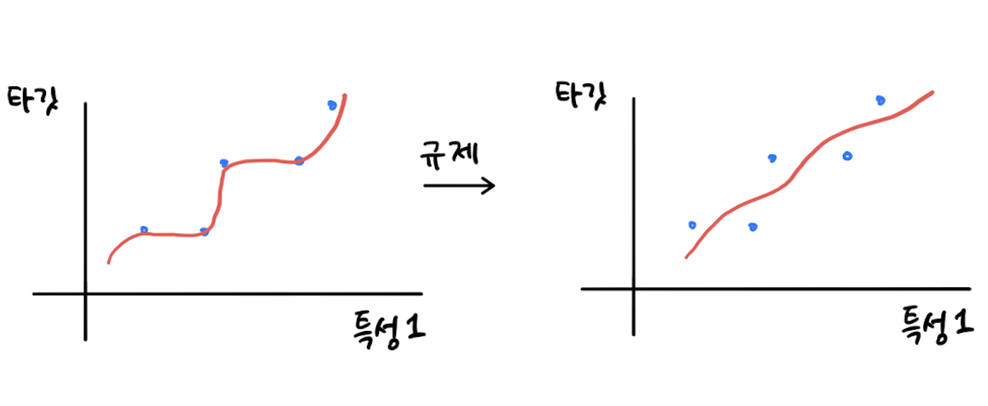

### 스케일
- 규제를 적용할 때 특성값의 크기가 차이가 많이 나면 공정하게 제어되지 않음
    - 규제 적용 전 정규화를 하는것이 일반적임
    - 표준 정규화 진행

In [20]:
# 표준 정규화
from sklearn.preprocessing import StandardScaler

# 훈련세트로 학습된 변환기를

 # 테스트 세트에도 적용

### 릿지 vs 라쏘
- 선형회귀 모델에 규제를 적용한 알고리즘
    - 계수의 크기를 줄인다
- 릿지 : 계수를 제곱한 값을 기준으로 규제를 적용
    - 보통 릿지를 조금 더 선호 함
        - 계수의 크기를 아주 작게 줄일수는 있지만 0으로 만들지는 않는다        
- 라쏘 : 계수의 절대값을 기준으로 규제를 적용
    - 라쏘는 계수를 아예 0으로 만들수도 있음

## 릿지

In [21]:
from sklearn.linear_model import Ridge



0.9896101671037343


- 5차항을 이용한 다항 회귀임
- 규제 적용 전보다 훈련점수가 약간 낮아짐

0.979069397761539


- 테스트 점수가 정상적으로 돌아옴

### 규제의 양을 조절
- alpha 값 : 사전에 사이언티스트가 조절하는 값(하이퍼 파라미터)
    - alpha값이 크면 규제 강도가 세지므로 계수값을 더 줄이고 조금 더 과소적합 되도록 유도
    - alpha값이 작으면 계수를 줄이는 역할이 줄어들고 선형회귀 모델과 유사해 짐
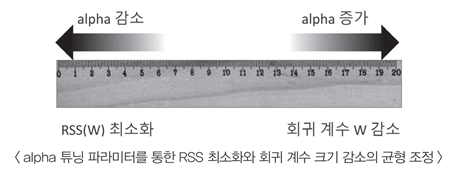
- 적절한 alpha값을 찾는 방법
    - alpha값에 대한 R2 값의 그래프를 그려보는 것
        - 훈련세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값이 됨

In [23]:
# alpha값에 따른 train/test score 저장을 위한 list 생성
import matplotlib.pyplot as plt

train_score = []
test_score = []

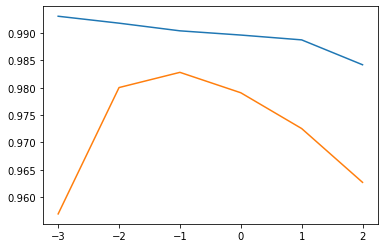

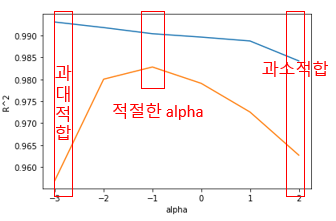
- log10한 -1 이 가장 적절
- np.log10(0.1) == -1
    - log10한 -1 ==> 10<sup>-1</sup> == 0.1

0.9903815817570368
0.9827976465386954


- 훈련세트와 테스트 세트 점수 모두 비슷하게 높고 
    - 과대적합과 과소적합 균형을 맞추고 있음

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,feature,coef
0,x0,27.619335
1,x1,-1.640222
2,x2,-19.732560
3,x0^2,30.030620
4,x0 x1,16.998003
5,x0 x2,17.832473
6,x1^2,4.469283
7,x1 x2,3.872585
8,x2^2,22.835182
9,x0^3,19.504175


## 라쏘

In [35]:
from sklearn.linear_model import Lasso



0.989789897208096


0.9800593698421884


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


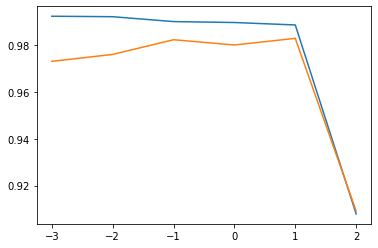

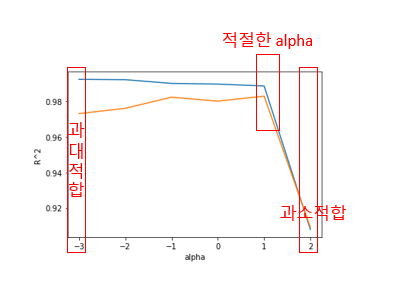
- log10한 1 이 가장 적절
- np.log10(10) == 1
    - log10한 1 ==> 10<sup>1</sup> == 10

0.9888067471131867
0.9824470598706695


- 과대 적합을 잘 억제하고 테스트의 성능을 높임

### 라쏘모델의 특징
- 라쏘 모델은 회귀 계수를 0으로 만드는 성향이 있음
- 계수(coef_)가 0인 특성의 개수  확인

40


- 55개의 특성 중 40개의 특성의 계수가 0으로 변환
    - 15개의 특성만 활용해서 모델링 진행되었음
        - 라쏘는 모델에 유용한 특성을 골라내는 용도로도 사용 가능

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,feature,coef
4,x0 x1,1.193990
12,x0 x1^2,80.032014
13,x0 x1 x2,168.240779


-  **15개가 0이 아닌걸로 나왔지만 그 값이 매우 작아서 실제 표현되는 계수는 3개로 확인됨**